## 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
#### 설명
- 해당 챕터에서는 정규분포에 대해서 이해하기 쉽게 설명하니, 이해가 안되면 여러번 읽어보세요!

In [2]:
# 데이터를 공부하다보면 '전처리'를 해야하는 상황이 나옵니다.
# 전처리를 한다는 것은 해당 값의 분포를 정규분포로 만들어 준다는 이야기인데요.

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

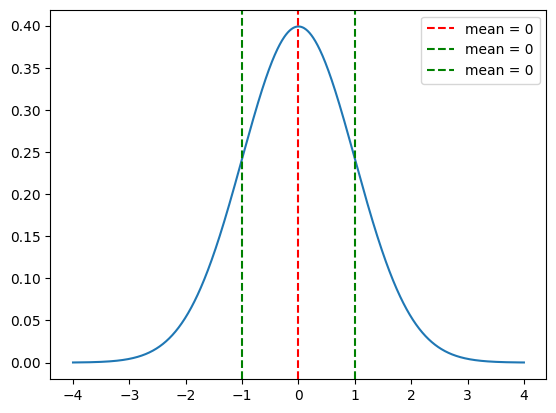

In [28]:
# 다음과 같이 평균이 0이고 표준편차가 1인 그래프를 정규분포라고 이야기합니다.
data = np.linspace(-4, 4, 1000)
mean = 0
std = 1
y = norm.pdf(data, mean, std)
plt.plot(data, y)
plt.axvline(mean, color='r', linestyle='dashed', label=f'mean = {mean}')
plt.axvline(mean-std, color='g', linestyle='dashed', label=f'mean = {mean}')
plt.axvline(mean+std, color='g', linestyle='dashed', label=f'mean = {mean}')
plt.legend()
plt.show()

In [29]:
# 데이터를 학습시키고, 잘 다루려면 데이터를 전처리 시켜야하는데 간단한 예시를 들어볼게요.
# 5, 10, 15의 값을 담고 있는 리스트가 있다고 가정을 해보죠.
# 해당 데이터는 어떻게 생겼나요? 똑같은 간격(차이)로 이루어져있죠?
a = [5, 10, 15]
# 여기서의 평균과 분산, 표준편차는 얼마인가요?
# 평균, 분산, 표준편차를 알려고 하는 이유는 해당 데이터의 분포를 보기 위함입니다.
# 분산을 구하기 위해서는 평균을 알아야하고, 표준편차를 구하려면 분산을 알아야하죠.
# 따라서 데이터에서는 서로 땔래야 땔 수 없는 관계라 꼭 알아두시는게 좋습니다.
# a에서의 평균은 10입니다.
print('a의 평균은 : {}'.format(sum(a)/len(a)))
# 분산은 각각의 값에서 평균을 빼준 값의 제곱을 한 후에 개수로 나눠주는 것을 의미합니다.
# ((5-10)^2+(10-10)^2+(15-10)^2)/2가 분산이죠
var = (pow(5-10, 2)+pow(10-10, 2)+pow(15-10, 2)/3)
print('a의 분산은 : {}'.format(round(var, 3)))
# 표준편차는 분산에 루트를 씌운 값이고.
std = pow(var, 0.5)
print('a의 표준편차는 : {}'.format(std))
# 표준편차가 5.777이라는 이야기는, 평균 10으로부터 5.777만큼 떨어져있다고 할 수 있습니다.
# 분산이 커지면, 표준편차도 커지겠고 분산의 값이 커진다는 것은, 평균으로부터 거리가 멀어진다라고 볼수 있겠네요!
# 그래서 a를 정규화 시킬껀데, 정규화를 시킬때는 a의 각각의 값에 평균을 뺀 다음, 표준편차로 나눠주면 됩니다.
re_a = [(5-10)/std, (10-10)/std, (15-10)/std]
print('따라 정규화 된 a =  {}'.format(re_a))
# 혹시 눈치채셨나요? 정규화 시킨다는 것은, 해당 값의 분포를 평균을 0으로 만든 지점을 기준으로 얼마나 떨어져있는가를 표현한 것입니다.
# 5와 15가 10을 기준으로 표준편차가 5.777이라 했고, 이걸 정규화 시키면 결국 5와 10은 부호를 제외하고는 동일한 수가 되겠네요!
# 근데 굳이 바꿔야 하나요?라고 질문할 수도 있어요!

a의 평균은 : 10.0
a의 분산은 : 33.333
a의 표준편차는 : 5.773502691896258
따라 정규화 된 a =  [-0.8660254037844386, 0.0, 0.8660254037844386]


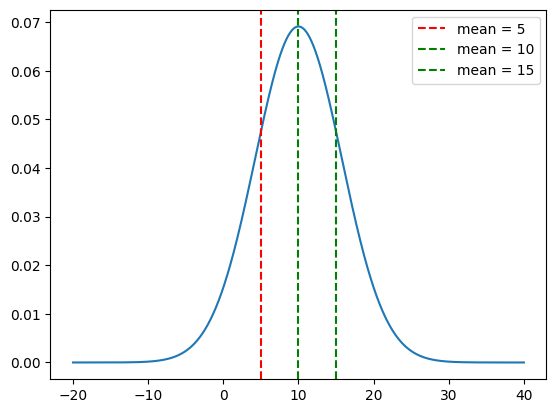

In [30]:
# 정규화 하지 않았을때의 그래프입니다. 그래 개형과 각 값의 분포를 잘 확인해주세요!
data = np.linspace(-20, 40, 1000)
mean = sum(a)/len(a)
y = norm.pdf(data, mean, std)
plt.plot(data, y)
plt.axvline(a[0], color='r', linestyle='dashed', label=f'mean = {a[0]}')
plt.axvline(a[1], color='g', linestyle='dashed', label=f'mean = {a[1]}')
plt.axvline(a[2], color='g', linestyle='dashed', label=f'mean = {a[2]}')
plt.legend()
plt.show()

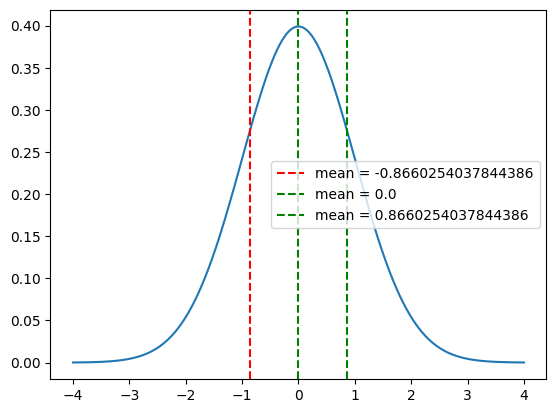

In [31]:
# 다음과 같이 평균이 0이고 표준편차가 1인 그래프를 정규분포라고 이야기합니다.
data = np.linspace(-4, 4, 1000)
mean = sum(re_a)/len(re_a)
std = 1
y = norm.pdf(data, mean, std)
plt.plot(data, y)
plt.axvline(re_a[0], color='r', linestyle='dashed', label=f'mean = {re_a[0]}')
plt.axvline(re_a[1], color='g', linestyle='dashed', label=f'mean = {re_a[1]}')
plt.axvline(re_a[2], color='g', linestyle='dashed', label=f'mean = {re_a[2]}')
plt.legend()
plt.show()

In [34]:
# 정규 분포를 사용했을때, x의 구간은 바뀔 수 있어도, 데이터의 상대적 위치는 변하지 않네요!
# 다른 예시를 한번 들어볼게요.
b = [10, 20, 30, 1000]
# 너무 극단적인 예시인가요? 1000이라는 값때문에 데이터가 많은 영향을 받겠군요!
mean = (10+20+30+1000)/4
print('b의 평균은 : {}'.format(mean))
# 와 평균이 너무 크네요! 이어서 분산도 구해볼게요.
var = (pow(10-mean, 2)+pow(20-mean, 2)+pow(30-mean, 2)+pow(1000-mean, 2))
print('b의 분산은 : {}'.format(var))
# 분산이 엄청 크죠? 표준편차는요.
std = pow(var, 0.5)
print('b의 표준편차는 : {}'.format(std))

b의 평균은 : 265.0
b의 분산은 : 720500.0
b의 표준편차는 : 848.8227141164402


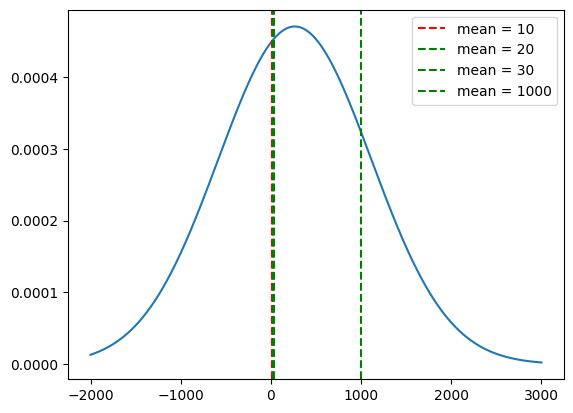

In [40]:
# 정규화 하지 않았을때의 그래프입니다. 그래 개형과 각 값의 분포를 잘 확인해주세요!
data = np.linspace(-2000, 3000, 1000)
mean = sum(b)/len(b)
y = norm.pdf(data, mean, std)
plt.plot(data, y)
plt.axvline(b[0], color='r', linestyle='dashed', label=f'mean = {b[0]}')
plt.axvline(b[1], color='g', linestyle='dashed', label=f'mean = {b[1]}')
plt.axvline(b[2], color='g', linestyle='dashed', label=f'mean = {b[2]}')
plt.axvline(b[3], color='g', linestyle='dashed', label=f'mean = {b[3]}')
plt.legend()
plt.show()

In [35]:
# 자 그럼 이 데이터를 정규분포로 나타내볼까요?
re_b = [(b[0]-mean)/std, (b[1]-mean)/std, (b[2]-mean)/std, (b[3]-mean)/std]
# 10부터 1000까지의 데이터가 다음처럼 바뀌었네요!
print('정규화된 b는 : {}'.format(re_b))

정규화된 b는 : [-0.3004160889655687, -0.2886350658688797, -0.2768540427721908, 0.8659051976066392]


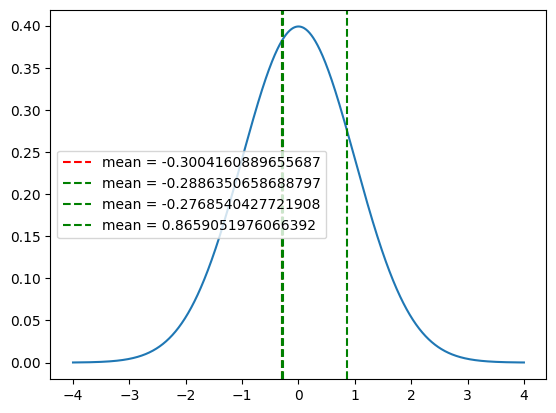

In [42]:
# 다음과 같이 평균이 0이고 표준편차가 1인 그래프를 정규분포라고 이야기합니다.
data = np.linspace(-4, 4, 1000)
mean = sum(re_b)/len(re_b)
std = 1
y = norm.pdf(data, mean, std)
plt.plot(data, y)
plt.axvline(re_b[0], color='r', linestyle='dashed', label=f'mean = {re_b[0]}')
plt.axvline(re_b[1], color='g', linestyle='dashed', label=f'mean = {re_b[1]}')
plt.axvline(re_b[2], color='g', linestyle='dashed', label=f'mean = {re_b[2]}')
plt.axvline(re_b[3], color='g', linestyle='dashed', label=f'mean = {re_b[3]}')
plt.legend()
plt.show()

In [43]:
# 어떤가요? x의 값만 바뀌고 결국 그래프 개형은 같죠? 우리가 정규화된 데이터를 사용하는 이유는 KNeighborsClassifier와 같이
# 값들 사이에 거리를 통해서 값을 추측하는 모델의 경우, 원본 데이터를 사용할 때 정확도가 떨어집니다. 따라서 정규화를 통해 데이터를 일반화 시키는 것입니다.